In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,SpectralClustering,SpectralBiclustering
import scipy.stats as sts
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',200)
pd.set_option('max_rows',200)
pd.set_option('max_colwidth',None)

In [2]:
df = pd.read_csv('../dataset/train.csv')
df.head()

session_id  index  elapsed_time      event_name   name  level  page  \
0  20090312431273200      0             0  cutscene_click  basic      0   NaN   
1  20090312431273200      1          1323    person_click  basic      0   NaN   
2  20090312431273200      2           831    person_click  basic      0   NaN   
3  20090312431273200      3          1147    person_click  basic      0   NaN   
4  20090312431273200      4          1863    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991405  -159.314686          380.0          494.0             NaN   
1  -413.991405  -159.314686          380.0          494.0             NaN   
2  -413.991405  -159.314686          380.0          494.0             NaN   
3  -413.991405  -159.314686          380.0          494.0             NaN   
4  -412.991405  -159.314686          381.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                            text_fqid  fullscreen  hq  music  \
0                tunic.historicalsociety.closet.intro           0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
2  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
3  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   
4  tunic.historicalsociety.closet.gramps.intro_0_cs_0           0   0      1   

  level_group  
0         0-4  
1         0-4  
2         0-4  
3         0-4  
4         0-4

In [3]:
kmodel = KMeans()
# scmodel = SpectralClustering(n_clusters=18)
# sbmodel = SpectralBiclustering(n_clusters=18)

In [19]:
data = df[['room_coor_x','room_coor_y','level_group']]
x = data[['room_coor_x','room_coor_y']]
x['room_coor_x'] = x['room_coor_x'].fillna(-2000)
x['room_coor_y'] = x['room_coor_y'].fillna(-800)
kmodel.fit(x)

KMeans()

In [20]:
kmodel.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [21]:
data['labels'] = kmodel.labels_
data.head()

room_coor_x  room_coor_y level_group  labels
0  -413.991405  -159.314686         0-4       5
1  -413.991405  -159.314686         0-4       5
2  -413.991405  -159.314686         0-4       5
3  -413.991405  -159.314686         0-4       5
4  -412.991405  -159.314686         0-4       5

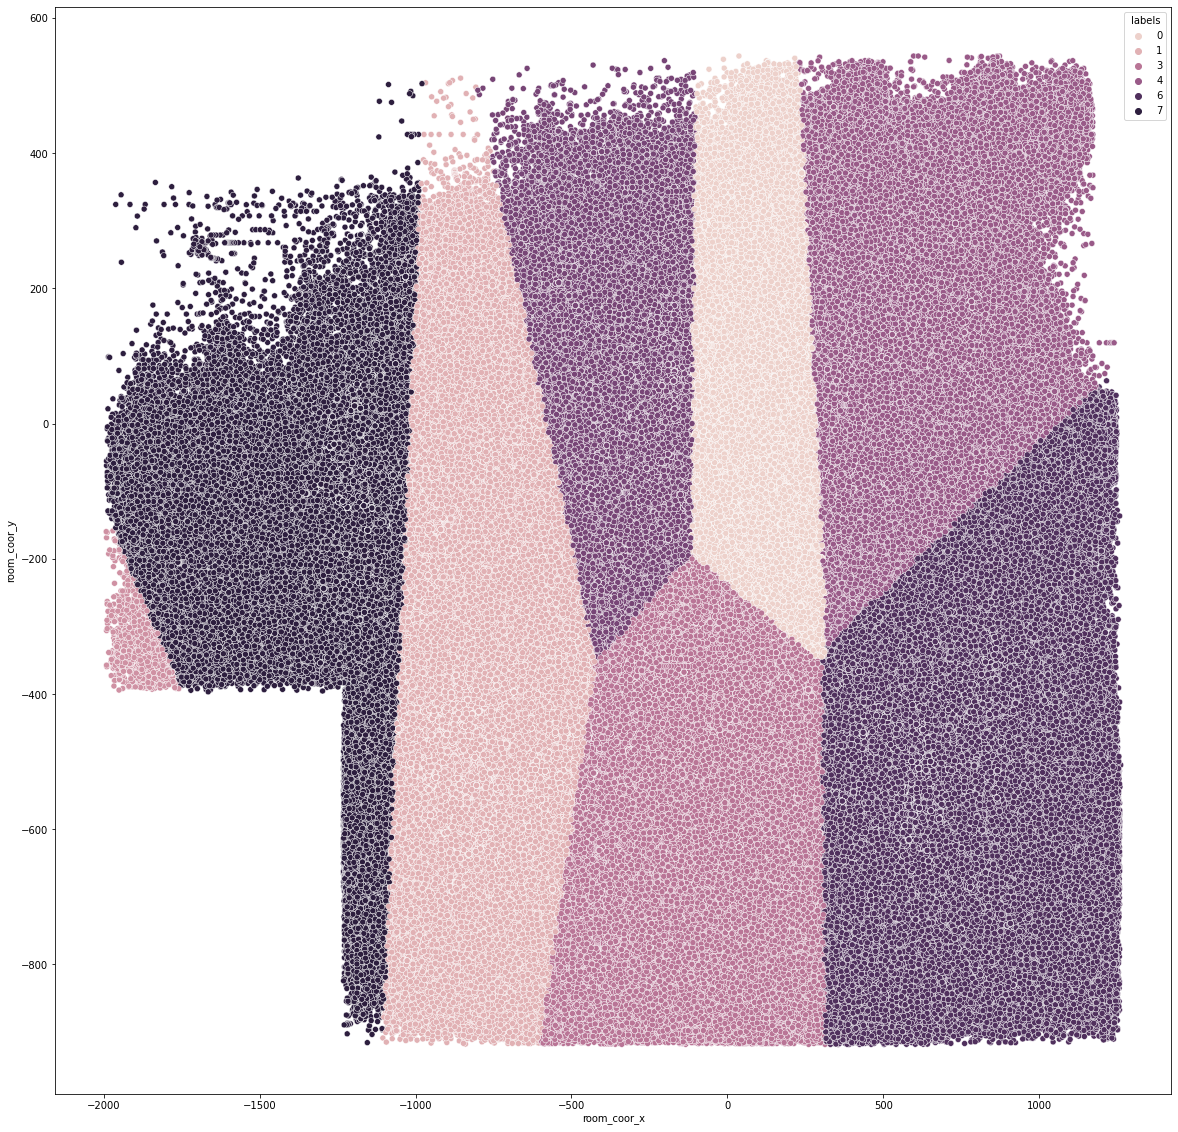

In [22]:
plt.figure(figsize=(20,20))
g = sns.scatterplot(data=data,x='room_coor_x',y='room_coor_y',hue='labels')
plt.show()

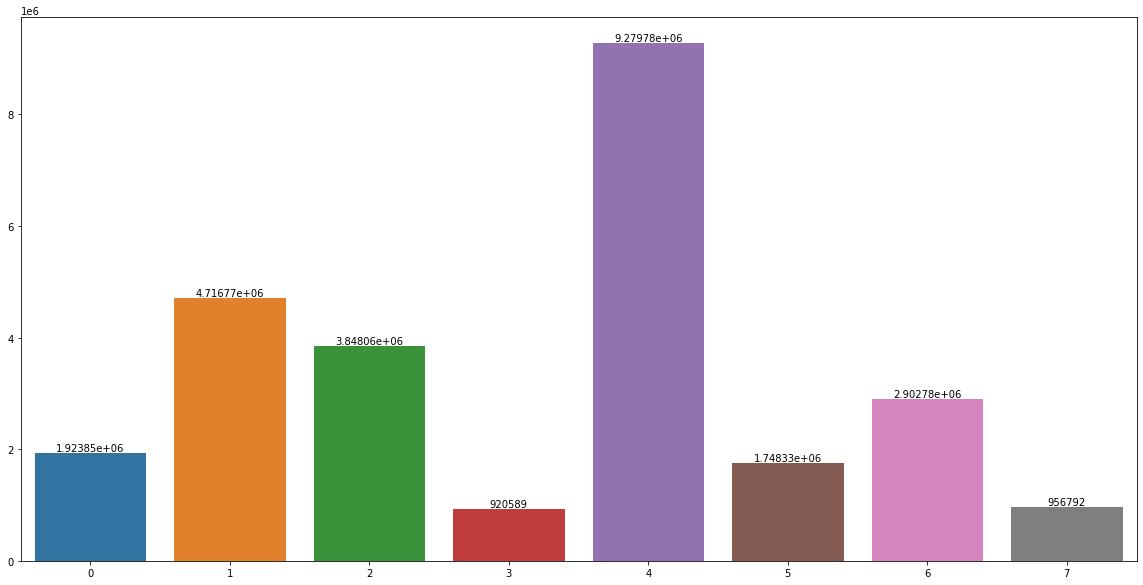

In [11]:
labels = data['labels'].value_counts().sort_index()
plt.figure(figsize=(20,10))
g = sns.barplot(x = labels.index, y = labels.values)
g.bar_label(g.containers[0])
plt.show()
del labels,g

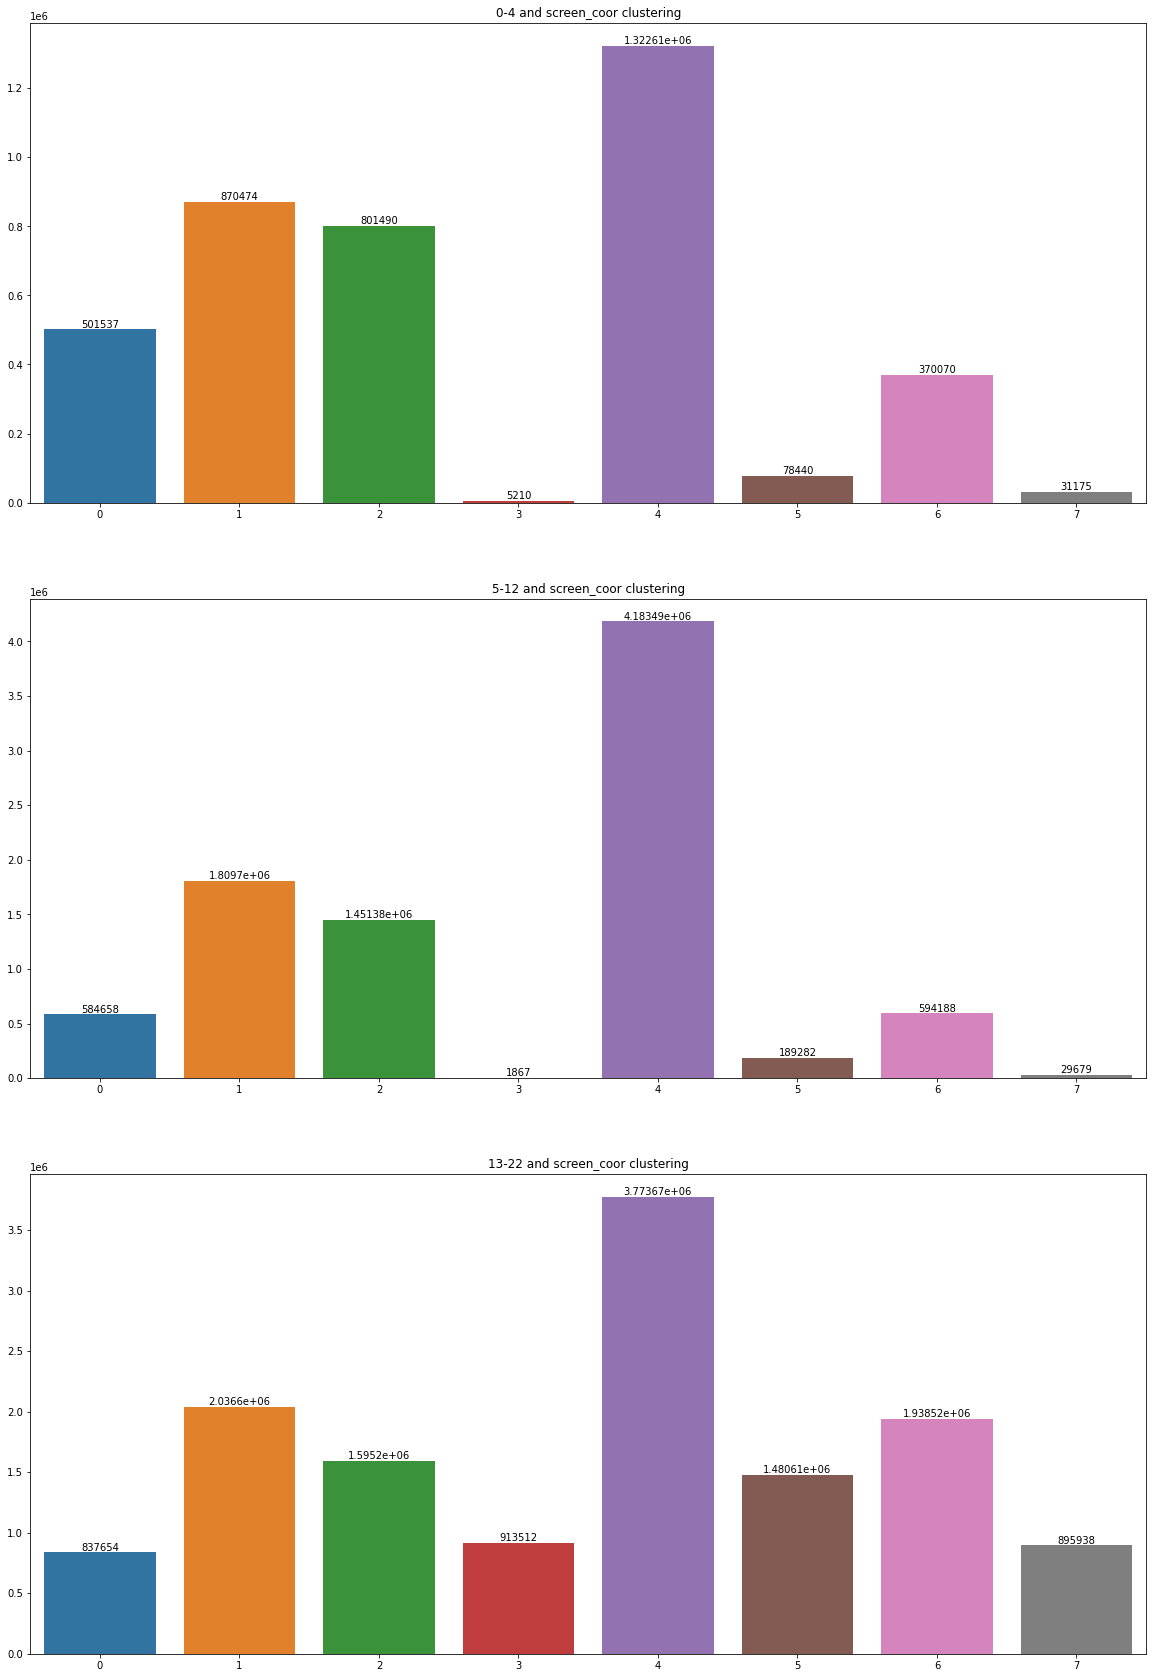

In [12]:
groups = data['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for gs in groups:
    temp = data[data['level_group']==gs]
    temp = temp.labels.value_counts()
    g = sns.barplot(x = temp.index, y = temp.values, ax=axs[groups.index(gs)])
    g.bar_label(g.containers[0])
    g.set_title('{} and screen_coor clustering'.format(gs))
plt.show()
del groups,temp,g

In [13]:
del data
df_screen = df[['screen_coor_x','screen_coor_y','level_group']]
x1 = df_screen[['screen_coor_x','screen_coor_y']].fillna(0)
kmodel.fit(x1)

KMeans()

In [14]:
df_screen['labels'] = kmodel.labels_
df_screen.head()

screen_coor_x  screen_coor_y level_group  labels
0          380.0          494.0         0-4       0
1          380.0          494.0         0-4       0
2          380.0          494.0         0-4       0
3          380.0          494.0         0-4       0
4          381.0          494.0         0-4       0

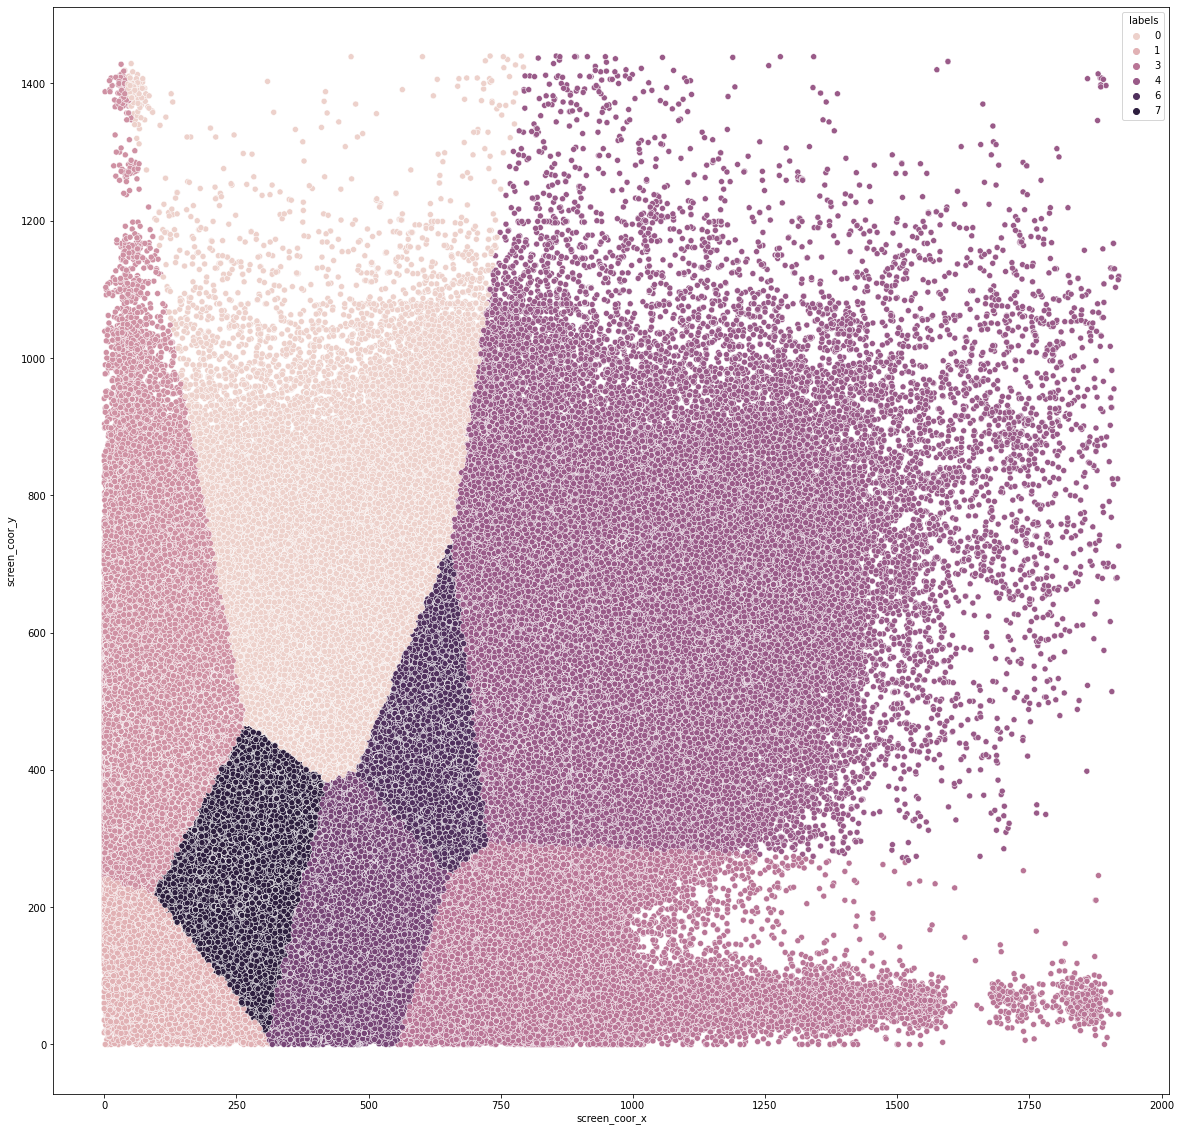

In [15]:
plt.figure(figsize=(20,20))
g = sns.scatterplot(data=df_screen, x = 'screen_coor_x',y = 'screen_coor_y',hue='labels')
plt.show()

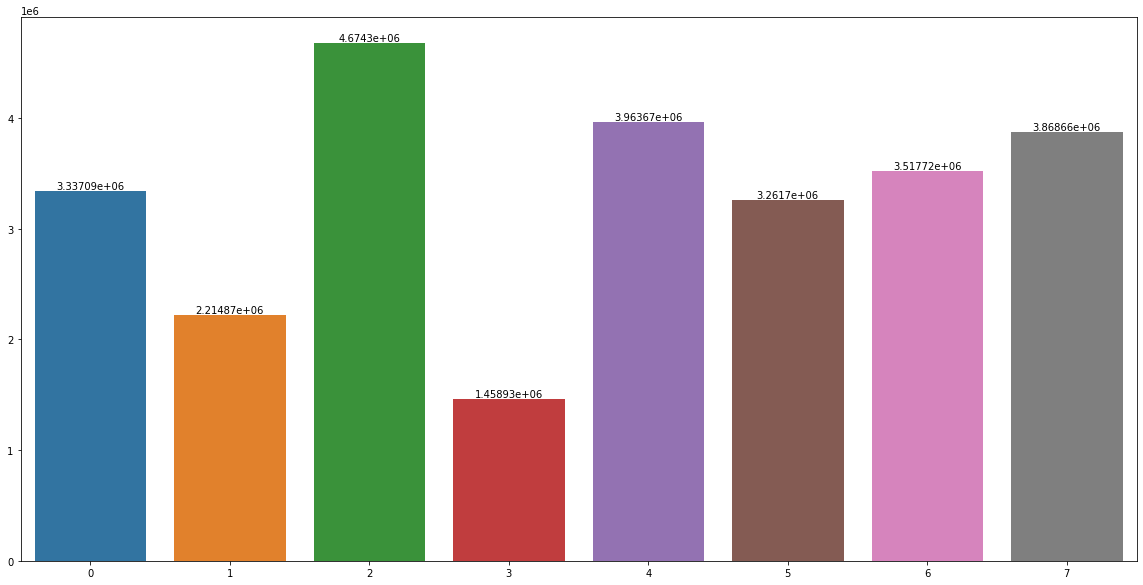

In [16]:
labels = df_screen['labels'].value_counts().sort_index()
plt.figure(figsize=(20,10))
g = sns.barplot(x = labels.index, y = labels.values)
g.bar_label(g.containers[0])
plt.show()
del labels,g

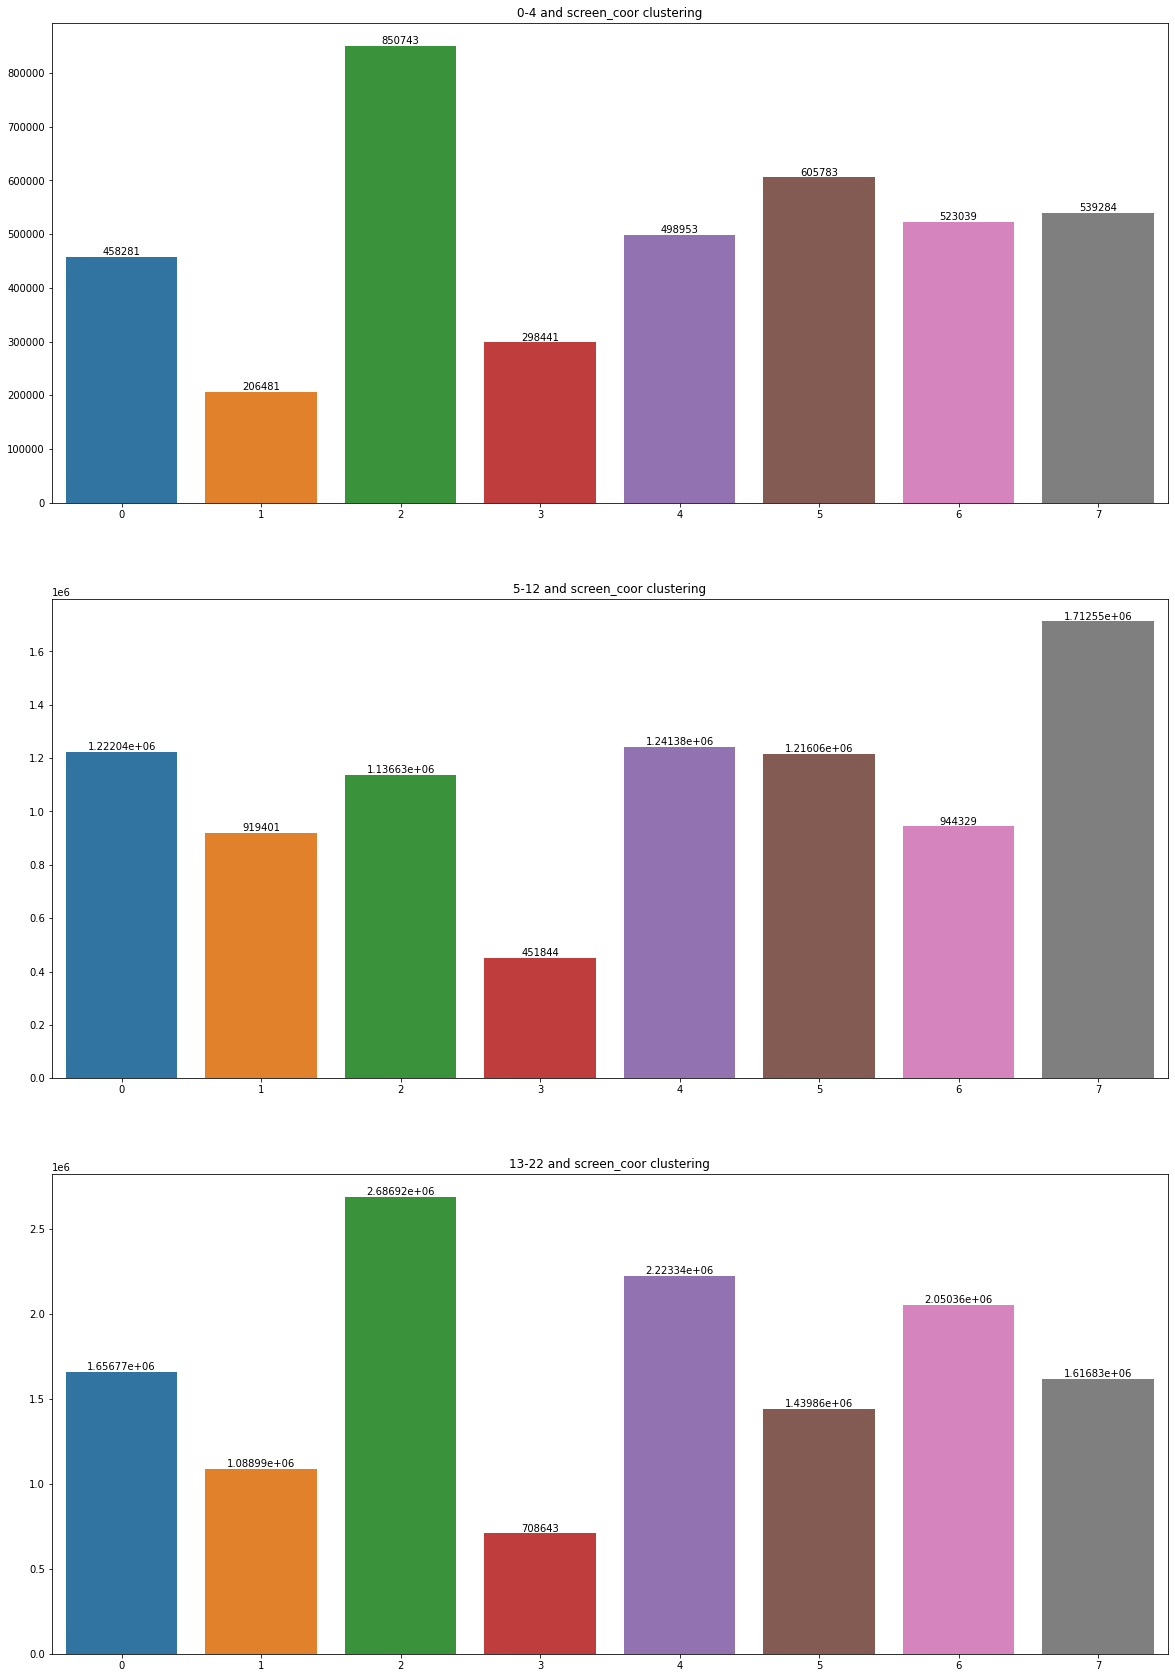

In [17]:
groups = df_screen['level_group'].unique().tolist()
fig,axs = plt.subplots(3,1,figsize=(20,30))
for gs in groups:
    temp = df_screen[df_screen['level_group']==gs]
    temp = temp.labels.value_counts()
    g = sns.barplot(x = temp.index, y = temp.values, ax=axs[groups.index(gs)])
    g.bar_label(g.containers[0])
    g.set_title('{} and screen_coor clustering'.format(gs))
plt.show()
del groups,temp,g

In [18]:
del df_screen